In [21]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Get data from file
cwd = "/Users/madea/Desktop/DS4A/data/"
filename = "merged_RRI_SRI_data.csv"
filepath = cwd + filename
print(filepath)

/Users/madea/Desktop/DS4A/data/merged_RRI_SRI_data.csv


In [23]:
SRI_RRI_df = pd.read_csv(filepath)
SRI_RRI_df = SRI_RRI_df[SRI_RRI_df.notna()]

In [24]:
print("Number of Features:", len(SRI_RRI_df.columns))
print("Number of Samples: ", len(SRI_RRI_df.index))
print(SRI_RRI_df.head(5))

Number of Features: 1191
Number of Samples:  1091
         date  segment_1307_max_SRI  segment_873_max_SRI  segment_863_max_SRI  \
0  2018-03-08              3.718594             3.457253             4.562368   
1  2018-03-09              4.522901             3.488016             2.997927   
2  2018-03-10              6.107322             1.234070             3.085771   
3  2018-03-11              3.873077             1.261212             6.840369   
4  2018-03-12              5.228657             3.413127             4.470042   

   segment_1061_max_SRI  segment_235_max_SRI  segment_225_max_SRI  \
0              0.044862             2.945760             4.199607   
1              0.044862             2.187291             5.328785   
2              0.044862             2.719971             5.989625   
3              0.044862             3.189822             5.489281   
4              0.044862             3.863130             4.415463   

   segment_460_max_SRI  segment_518_max_SRI  seg

Considering each segment of the road and station of the subway as the feature. Sample points are respectively SRI and RRI for given day, date in time.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

copy_df = SRI_RRI_df.copy(deep=True)
copy_df = copy_df.fillna(0)

# train_percent = 0.7
# total_num_samples = len(copy_df.index)
# train_samples = math.ceil(train_percent * total_num_samples)

# train_df = copy_df[0:train_samples].copy(deep=True)

features = copy_df.columns[copy_df.columns != 'date']

# train_df = train_df.dropna()
x = copy_df.loc[:, features].values
y = copy_df.loc[:,['date']].values

print(copy_df.columns)
print(x)

X = StandardScaler().fit_transform(x)


Index(['date', 'segment_1307_max_SRI', 'segment_873_max_SRI',
       'segment_863_max_SRI', 'segment_1061_max_SRI', 'segment_235_max_SRI',
       'segment_225_max_SRI', 'segment_460_max_SRI', 'segment_518_max_SRI',
       'segment_470_max_SRI',
       ...
       'station_40840_max_RRI', 'station_40850_max_RRI',
       'station_40610_max_RRI', 'station_40600_max_RRI',
       'station_41690_max_RRI', 'station_41680_max_RRI',
       'station_40280_max_RRI', 'station_40290_max_RRI',
       'station_41200_max_RRI', 'station_41210_max_RRI'],
      dtype='object', length=1191)
[[ 3.71859434  3.45725327  4.56236783 ...  1.46995743  1.25760969
   0.46676522]
 [ 4.52290077  3.4880156   2.99792708 ...  1.30820061  0.73234454
   0.97556654]
 [ 6.10732158  1.23406956  3.08577103 ...  2.43492688  1.47396656
   3.28196059]
 ...
 [ 5.00027527  1.26121192  3.07582245 ... -1.14913715 -1.13862284
  -1.94974363]
 [ 5.1207392   1.3205983   1.99847392 ...  2.28822288  1.41131448
   2.69400324]
 [ 3.48198141

In [26]:
num_components = 2
pca = PCA(n_components = num_components)
principalComponents = pca.fit_transform(X)


print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Singular Values:", pca.singular_values_)

PCA Explained Variance Ratio: [0.11049072 0.08191194]
PCA Singular Values: [378.26889848 325.69519219]


In [27]:
PCA_df = pd.DataFrame(data = principalComponents,
                      columns = ['pc1', 'pc2'])
PCA_df['date'] = y
print(PCA_df.head(5))

        pc1        pc2        date
0 -9.296984  -3.748080  2018-03-08
1 -7.589957  -4.760699  2018-03-09
2  3.523980 -13.698625  2018-03-10
3  5.665600 -21.936094  2018-03-11
4 -9.002845  -3.056505  2018-03-12


## Using Plotly vs. Seaborn

Plotly is an interactive map. Can hover over each point to get information on pc1, pc2, and date values.

In [28]:
import plotly.express as px
# # visualize PCA https://plotly.com/python/pca-visualization/
# total_variance = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(PCA_df, x="pc1", y="pc2", color=PCA_df["date"], labels = {str(i):f"PC {i+1}" for i in range(num_components)})

fig.show()



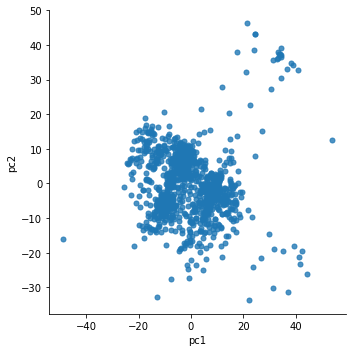

In [29]:
sns.lmplot(x="pc1", y="pc2",
        data=PCA_df,
        fit_reg=False,
        legend=True,
        scatter_kws={"s": 25})

## t-SNE

Work based on teammate Jacqueline's work.

In [30]:
print(SRI_RRI_df.head(5))
print(SRI_RRI_df.shape)

         date  segment_1307_max_SRI  segment_873_max_SRI  segment_863_max_SRI  \
0  2018-03-08              3.718594             3.457253             4.562368   
1  2018-03-09              4.522901             3.488016             2.997927   
2  2018-03-10              6.107322             1.234070             3.085771   
3  2018-03-11              3.873077             1.261212             6.840369   
4  2018-03-12              5.228657             3.413127             4.470042   

   segment_1061_max_SRI  segment_235_max_SRI  segment_225_max_SRI  \
0              0.044862             2.945760             4.199607   
1              0.044862             2.187291             5.328785   
2              0.044862             2.719971             5.989625   
3              0.044862             3.189822             5.489281   
4              0.044862             3.863130             4.415463   

   segment_460_max_SRI  segment_518_max_SRI  segment_470_max_SRI  ...  \
0             3.028331   

In [31]:
clean_copy_df = SRI_RRI_df.interpolate(axis=0, limit_direction='both').fillna(-1)

# separate features X and date time Y
X = clean_copy_df.iloc[:, 1:].values
Y = clean_copy_df.iloc[:, 0]

# date -> datetime object
Y = pd.to_datetime(Y)

# standard normalize features
X = X / X.max()
X = StandardScaler().fit_transform(X)

In [32]:
# Masks for days in the week

mask_monday = Y.dt.day_of_week == 0
mask_tuesday = Y.dt.day_of_week == 1
mask_wednesday = Y.dt.day_of_week == 2
mask_thursday = Y.dt.day_of_week == 3
mask_friday = Y.dt.day_of_week == 4
mask_saturday = Y.dt.day_of_week == 5
mask_sunday = Y.dt.day_of_week == 6

list_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [33]:
# Masks for seasons

from matplotlib.pyplot import summer


winter_start_0 = '12-21'
winter_start_1 = '01-01'
spring_start = '03-20'
summer_start = '06-21'
fall_start = '12-21'

list_seasons = ['winter', 'spring', 'summer', 'fall']

mask_winter = (Y.dt.strftime('%m-%d') >= winter_start_0) | ((Y.dt.strftime('%m-%d') >= winter_start_1) & (Y.dt.strftime('%m-%d') < spring_start))
mask_spring = (Y.dt.strftime('%m-%d') >= spring_start) & (Y.dt.strftime('%m-%d') < summer_start)
mask_summer = (Y.dt.strftime('%m-%d') >= summer_start) & (Y.dt.strftime('%m-%d') < fall_start)
mask_fall = (Y.dt.strftime('%m-%d') >= fall_start) & (Y.dt.strftime('%m-%d') < winter_start_0)

In [34]:
# Masks for seasons and days of the week

seasons = pd.Series(np.zeros(len(Y)), name='seasons')
seasons[mask_winter] = list_seasons[0]
seasons[mask_spring] = list_seasons[1]
seasons[mask_summer] = list_seasons[2]
seasons[mask_fall] = list_seasons[3]

days = pd.Series(np.zeros(len(Y)), name='day_of_week')
days[mask_monday] = list_days[0]
days[mask_tuesday] = list_days[1]
days[mask_wednesday] = list_days[2]
days[mask_thursday] = list_days[3]
days[mask_friday] = list_days[4]
days[mask_saturday] = list_days[5]
days[mask_sunday] = list_days[6]

In [35]:
from sklearn.manifold import TSNE

X_embedded = TSNE(init='random', learning_rate='auto').fit_transform(X)
print(X_embedded.shape)

tSNE_df = pd.concat([Y, seasons, days, pd.DataFrame(X_embedded, columns=['tSNE1', 'tSNE2'])], axis=1)
tSNE_df.head()

fig = px.scatter(tSNE_df, x='tSNE1', y='tSNE2', color=tSNE_df['day_of_week'])
fig.show()

(1091, 2)


In [40]:
filename = 'maintenance.csv'
filepath_2 = cwd + filename

maintenance_df = pd.read_csv(filepath_2)

In [41]:
X_embedded_2 = TSNE(init='random', learning_rate='auto').fit_transform(X)
print(X_embedded.shape)

tSNE_df = pd.concat([maintenance_df, seasons, days, pd.DataFrame(X_embedded_2, columns=['tSNE1', 'tSNE2'])], axis=1)
tSNE_df.head()

(1091, 2)


,date,maintenance,seasons,day_of_week,tSNE1,tSNE2
0,2018-03-08,False,winter,Thursday,8.829028,2.246745
1,2018-03-09,False,winter,Friday,8.601071,1.159054
2,2018-03-10,False,winter,Saturday,4.177790,-9.552353
3,2018-03-11,False,winter,Sunday,3.534272,-12.103314
4,2018-03-12,False,winter,Monday,8.650638,2.376979


In [42]:
fig = px.scatter(tSNE_df, x='tSNE1', y='tSNE2', color=tSNE_df['maintenance'])
fig.show()

In [66]:
# num_runs = 20

# tSNE_frames = {}

# for run in num_runs:
#     X_embedded = TSNE(init='random', learning_rate='auto').fit_transform(X)
#     tSNE_df = pd.concat([maintenance_df, seasons, days, pd.DataFrame(X_embedded, columns=['tSNE1', 'tSNE2'])], axis=1)
#     tSNE_frames[f'{run}'] = tSNE_df

# avg_tSNE_df = #get mean of all dataframes in dictionary 'tSNE1' and 'tSNE2' values

In [67]:
# Clustering

from sklearn.cluster import KMeans

num_max_clusters = 10

#Z meazaurement of inertia = distance between data point and center of its cluster
def cluster(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_embedded)
    Z = kmeans.predict(X_embedded)
    return kmeans, Z

inertias = np.zeros(num_max_clusters)
for i in range(1, num_max_clusters):
    kmeans, Z = cluster(i)
    inertias[i] = kmeans.inertia_

https://plotly.com/python/v3/ipython-notebooks/baltimore-vital-signs/

In [85]:
# Trying to validate number of clusters
# import plotly.graph_objects as pgo

# x_values = []
# x_values.append(range(1, num_max_clusters))
# print(x_values)
# data = pgo.Data([pgo.Scatter(x=x_values, y=inertias[1:])])


# layout = pgo.Layout(xaxis=pgo.layout.XAxis(title='Number of Clusters', range=[0, num_max_clusters]),
#                     yaxis=pgo.layout.YAxis(title='Inertia'))

# fig = pgo.Figure(data=data, layout=layout)
# fig.show()

In [90]:
import plotly.graph_objects as pgo

num_clusters = 2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_embedded)
print('KMeans Cluster Centers: ', kmeans.cluster_centers_)

fig3 = pgo.Scatter(x=X_embedded[:, 0], y=X_embedded[:, 1],
                  mode='markers',
                  marker=pgo.scatter.Marker(symbol='x', size=4, color=range(num_clusters)))
# fig3 = px.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

fig3.show()

KMeans Cluster Centers:  [[-1.2256452 -6.956295 ]
 [ 1.7288316  8.775956 ]]


ValueError: 
    Invalid value of type 'builtins.range' received for the 'color' property of scatter.marker
        Received value: range(0, 2)

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above